In [ ]:
!pip install nltk

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
dset = pd.read_csv('TwitterSentiment.csv')
dset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
dset.shape

(14640, 15)

In [7]:
features = dset.iloc[:,10].values
labels = dset.iloc[:,1].values

In [8]:
len(features)

14640

In [9]:
features[0:3]

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!"],
      dtype=object)

In [10]:
type(features)

numpy.ndarray

In [11]:
final_features = []
for sentence in range(0,len(features)):
    intmdt_feature = re.sub(r'\W',' ',str(features[sentence])) #\W -> Any non-word character
    intmdt_feature = re.sub(r'\s+[A-Za-z]\s+',' ',intmdt_feature)
    intmdt_feature = re.sub(r'\^[A-Za-z]\s+',' ',intmdt_feature)
    intmdt_feature = re.sub(r'\s+',' ',intmdt_feature,flags=re.I)#\s+ -> 1 or more spaces will be replaced with a single space, flags-> Ignore case
    intmdt_feature = re.sub(r'\^b\s+','',intmdt_feature) #\b -> word boundary
    intmdt_feature = intmdt_feature.lower()
    final_features.append(intmdt_feature)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
nltk.download('stopwords')
vec = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
'''
max_features = 2500 -> consider the top 2500 tokens that appear frequently
min_df = 7 -> ignore terms that appear in less than 7 documents
max_df = 0.8 -> ignore terms that appear in more than 80% of the documents
'''
final_features = vec.fit_transform(final_features).toarray()
final_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(final_features,labels,test_size=0.2,random_state=10)

In [15]:
y_train.shape

(11712,)

In [16]:
y_train[100]

'negative'

In [17]:
X_train.shape

(11712, 2301)

In [18]:
X_train[100]

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
model = RandomForestClassifier(n_estimators=200,max_depth=800)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7496584699453552

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1679,   64,   38],
       [ 380,  246,   54],
       [ 152,   57,  258]])

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC

In [38]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis(solver='svd')))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10,metric='minkowski')))
models.append(('DT',DecisionTreeClassifier(criterion='gini')))
models.append(('RF',RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None)))
models.append(('SVM',SVC(C=1.0,kernel='rbf',degree=3,gamma='auto')))
models.append(('BNB',BernoulliNB()))
models.append(('GNB',GaussianNB()))

In [ ]:
cvresults = []
names = []
res = []
for name, model in models:
    skf = StratifiedKFold(n_splits=10)
    cvres = cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')
    cvresults.append(cvres)
    names.append(name)
    res.append(cvres.mean())
    print("Name:",name," Mean cross val res:",cvres.mean())

In [42]:
res

[0.7745910848928748,
 0.760931556996004,
 0.7286573565372498,
 0.6723030693406936,
 0.7543562720232699,
 0.6315744834641492,
 0.7721159535183313,
 0.430755414554813]

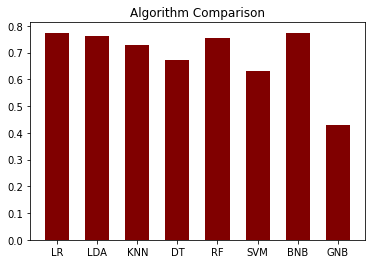

In [46]:
plt.bar(names, res, color ='maroon', width = 0.6)
plt.title('Algorithm Comparison')
plt.show()

In [50]:
model = BernoulliNB()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7766393442622951

In [51]:
confusion_matrix(y_test,pred)

array([[1525,  167,   89],
       [ 201,  410,   69],
       [  63,   65,  339]])